### import the file

In [1]:
import pandas as pd
import nltk
import numpy as np

In [2]:
model_df = pd.read_csv("ITBW51_210895h_cleaned_dataset.csv",sep=',')
model_df

genre                                              final
0      action  forc awaken newest chapter long run space oper...
1      action  noth advertis l admit saw thought pretti good ...
2      action  aim experi escap hour occasion escap often unf...
3      action  pass sinc event episod bewar spoiler ahead spe...
4      action  octob almost five ago next month announc regar...
...       ...                                                ...
28817   scifi  share dream christoph nolan sure hollywood inv...
28818   scifi  devilishli complic enjoy sci fi voyag across d...
28819   scifi  incept masterpiec huge big ambit christoph nol...
28820   scifi                 stun achiev complet entertain seen
28821   scifi  incept exhilar cinemat experi suggest room blo...

[28822 rows x 2 columns]

### Remove the null values from the df

In [3]:
mask = model_df['final'].isnull()
model_df = model_df[~mask]
len(model_df)

28756

### Convert the genre into numbers so that the model can predict

In [4]:
model_df["genre"] = model_df["genre"].map({"action": 1, "comedy": 2,"scifi": 3})

C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\263757300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["genre"] = model_df["genre"].map({"action": 1, "comedy": 2,"scifi": 3})


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

In [215]:
X = model_df['final']
Y = model_df['genre']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify = model_df['genre'])
corpus = model_df['final'].tolist()

In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=None)

# Fit and transform the data
lol = vectorizer.fit_transform(X_train)

# Get the number of features
max_features = lol.shape[1]

print("Number of features after TfidfVectorizer: ", max_features)

Number of features after TfidfVectorizer:  13937


## Checking which number of feature is the best

the more the number of feature, the model performs better so keep the number of features max.

In [263]:
# Splitting the data into train and test sets
X = model_df['final']
Y = model_df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = model_df['genre'])

# create a list of values to test for max_features
max_features_list = [3000, 6000, 9000, 12000, lol.shape[1]]

# list of 5 different models
models = [LogisticRegression(), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(), 
          KNeighborsClassifier(), 
          SVC()]

# initialize the results list
results = []

# loop through each model
for model in models:
    model_results = []
    
    # loop through the list of max_features values
    for max_features in max_features_list:
        # initialize the TfidfVectorizer with the current max_features value
        tfidf_vec = CountVectorizer(max_features=max_features)
        
        # fit the TfidfVectorizer on the training data and transform the training and test data into numerical features
        X_train_vec = tfidf_vec.fit_transform(X_train)
        X_test_vec = tfidf_vec.transform(X_test)
        
        # fit the current model on the transformed training data
        model.fit(X_train_vec, y_train)
        
        # make predictions on the transformed test data
        y_pred = model.predict(X_test_vec)
        
        # calculate the classification report for the current iteration
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # add the results for the current iteration to the model_results list
        model_results.append({
            'max_features': max_features,
            'accuracy': report['accuracy'],
        })
        
    # find the max_features with the best accuracy for the current model
    best_result = max(model_results, key=lambda x: x['accuracy'])
    
    # add the best result for the current model to the results list
    results.append({
        'model': type(model).__name__,
        'best_max_features': best_result['max_features'],
        'best_accuracy': best_result['accuracy']
    })

# convert the results list to a Pandas DataFrame for easier analysis
results_df = pd.DataFrame(results)



C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

FOR COUNT VECTORIZER:
#### from here we can see that logistic regression,RandomForestClassifier,SVC needs all the features to perform well
#### for decision tree they need 9000 features to obtain best accuracy
#### for knn, it needs the lowest amount of features which is 3000. it means that with lower features knn performs better.

In [264]:
results_df

model  best_max_features  best_accuracy
0      LogisticRegression              13937       0.943897
1  DecisionTreeClassifier               9000       0.850469
2  RandomForestClassifier              13937       0.921989
3    KNeighborsClassifier               3000       0.735829
4                     SVC              13937       0.907616

FOR TFIDF VECTORIZER:
#### from here we can see that logistic regression needs all the features to perform well
#### decision treem random forest and support vector machine they need 9000 features to obtain best accuracy
#### for knn, it needs the lowest amount of features which is 3000. it means that with lower features knn performs better.

In [261]:
# Splitting the data into train and test sets
X = model_df['final']
Y = model_df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = model_df['genre'])

# create a list of values to test for max_features
max_features_list = [3000, 6000, 9000, 12000, lol.shape[1]]

# list of 5 different models
models = [LogisticRegression(), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(), 
          KNeighborsClassifier(), 
          SVC()]

# initialize the results list
results = []

# loop through each model
for model in models:
    model_results = []
    
    # loop through the list of max_features values
    for max_features in max_features_list:
        # initialize the TfidfVectorizer with the current max_features value
        tfidf_vec = TfidfVectorizer(max_features=max_features)
        
        # fit the TfidfVectorizer on the training data and transform the training and test data into numerical features
        X_train_vec = tfidf_vec.fit_transform(X_train)
        X_test_vec = tfidf_vec.transform(X_test)
        
        # fit the current model on the transformed training data
        model.fit(X_train_vec, y_train)
        
        # make predictions on the transformed test data
        y_pred = model.predict(X_test_vec)
        
        # calculate the classification report for the current iteration
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # add the results for the current iteration to the model_results list
        model_results.append({
            'max_features': max_features,
            'accuracy': report['accuracy'],
        })
        
    # find the max_features with the best accuracy for the current model
    best_result = max(model_results, key=lambda x: x['accuracy'])
    
    # add the best result for the current model to the results list
    results.append({
        'model': type(model).__name__,
        'best_max_features': best_result['max_features'],
        'best_accuracy': best_result['accuracy']
    })

# convert the results list to a Pandas DataFrame for easier analysis
results_df = pd.DataFrame(results)

results_df

C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

model  best_max_features  best_accuracy
0      LogisticRegression              13937       0.947375
1  DecisionTreeClassifier               9000       0.858699
2  RandomForestClassifier               9000       0.928480
3    KNeighborsClassifier               3000       0.706271
4                     SVC               9000       0.956416

## Model 1: UniGram CountVectorizer

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Splitting the data into train and test sets
X = model_df['final']
Y = model_df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = model_df['genre'])

# Initialize the count vectorizer
vectorizer = CountVectorizer(ngram_range=(1,1))

# Fit the vectorizer to the training data and transform the train and test data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Define the different models
models = [
    LogisticRegression(solver='lbfgs'),
    KNeighborsClassifier(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Define the hyperparameter grids for each model
logistic_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
}
knn_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}
nb_grid = {
    'alpha': [0.1, 1, 10]
}
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7]
}
rf_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7]
}

# Define the grid dictionary that holds the hyperparameter grids for all the models
grid_dict = {
    'Logistic Regression': logistic_grid,
    'KNN': knn_grid,
    'Naive Bayes': nb_grid,
    'Decision Tree': dt_grid,
    'Random Forest': rf_grid
}

uni_cv_df = pd.DataFrame(columns=['Model Name(CV-UniGram)', 'Precision', 'Recall', 'F1-Score','Accuracy'])
# Loop through each model
for model_name, model in zip(['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'], models):
    # Perform grid search on the current model
    grid_search = GridSearchCV(model, grid_dict[model_name], scoring='accuracy', cv=5)
    grid_search.fit(X_train_vectorized, y_train)
    
    # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    print("Best accuracy found: ", grid_search.best_score_)
    # Train the model with the best parameters on the entire training data
    best_model = models[['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'].index(model_name)]
    best_model.set_params(**best_params)
    best_model.fit(X_train_vectorized, y_train)

    # Get the predictions on the test data
    y_pred = best_model.predict(X_test_vectorized)

    # Get the classification report
    cl_rp = classification_report(y_test, y_pred, target_names=['action', 'comedy', 'scifi'])
    class_report = classification_report(y_test, y_pred, target_names=['action', 'comedy', 'scifi'],output_dict=True)
    # Extract the precision, recall, and f1-score for the average/weighted average metric
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']
    accuracy = grid_search.best_score_
    # Append the metrics for the current model to the metrics dataframe
    uni_cv_df = uni_cv_df.append({'Model Name(CV-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)
    print("Classification Report: \n", cl_rp)

C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best accuracy found:  0.9425209307205031


C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2472442914.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_cv_df = uni_cv_df.append({'Model Name(CV-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Classification Report: 
               precision    recall  f1-score   support

      action       0.97      1.00      0.98      2940
      comedy       0.94      0.90      0.92      2902
       scifi       0.92      0.94      0.93      2785

    accuracy                           0.94      8627
   macro avg       0.94      0.94      0.94      8627
weighted avg       0.94      0.94      0.94      8627

Best accuracy found:  0.6870187261063954


C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2472442914.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_cv_df = uni_cv_df.append({'Model Name(CV-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Classification Report: 
               precision    recall  f1-score   support

      action       0.97      1.00      0.99      2940
      comedy       0.54      0.79      0.64      2902
       scifi       0.57      0.28      0.37      2785

    accuracy                           0.70      8627
   macro avg       0.69      0.69      0.67      8627
weighted avg       0.70      0.70      0.67      8627

Best accuracy found:  0.8946795641991651
Classification Report: 
               precision    recall  f1-score   support

      action       0.88      0.95      0.91      2940
      comedy       0.89      0.93      0.91      2902
       scifi       0.94      0.81      0.87      2785

    accuracy                           0.90      8627
   macro avg       0.90      0.90      0.90      8627
weighted avg       0.90      0.90      0.90      8627



C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2472442914.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_cv_df = uni_cv_df.append({'Model Name(CV-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Best accuracy found:  0.6778775845204925


C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2472442914.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_cv_df = uni_cv_df.append({'Model Name(CV-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Classification Report: 
               precision    recall  f1-score   support

      action       0.90      0.59      0.71      2940
      comedy       0.63      0.59      0.61      2902
       scifi       0.61      0.87      0.72      2785

    accuracy                           0.68      8627
   macro avg       0.71      0.68      0.68      8627
weighted avg       0.72      0.68      0.68      8627

Best accuracy found:  0.7470319321923029
Classification Report: 
               precision    recall  f1-score   support

      action       0.86      0.80      0.83      2940
      comedy       0.81      0.44      0.57      2902
       scifi       0.63      0.98      0.77      2785

    accuracy                           0.74      8627
   macro avg       0.77      0.74      0.72      8627
weighted avg       0.77      0.74      0.72      8627



C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2472442914.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_cv_df = uni_cv_df.append({'Model Name(CV-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


In [277]:
uni_cv_df

Model Name(CV-UniGram)  Precision    Recall  F1-Score  Accuracy
0    Logistic Regression   0.943312  0.943559  0.943146  0.942521
1                    KNN   0.694296  0.688081  0.665994  0.687019
2            Naive Bayes   0.901188  0.896518  0.896492  0.894680
3          Decision Tree   0.713859  0.684063  0.680139  0.677878
4          Random Forest   0.769434  0.741464  0.724214  0.747032

i chose to use macro avg for precision,recall,f1-score as i want to give equal importance to all the genres.

the countvec and unigram model:

Logistic Regression performs the best in every category and is by far the best model.
the 2nd best model is Naive Bayes with 89% accuracy and 90% precision.

it shows that the model predicts the model with almost better than 90% accuracy.

knn and decision tree has very low values for all the metrics. the accuracy is hovering around the 67% range.

C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\3697007010.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(uni_cv_df['Model Name(CV-UniGram)'], rotation=90)


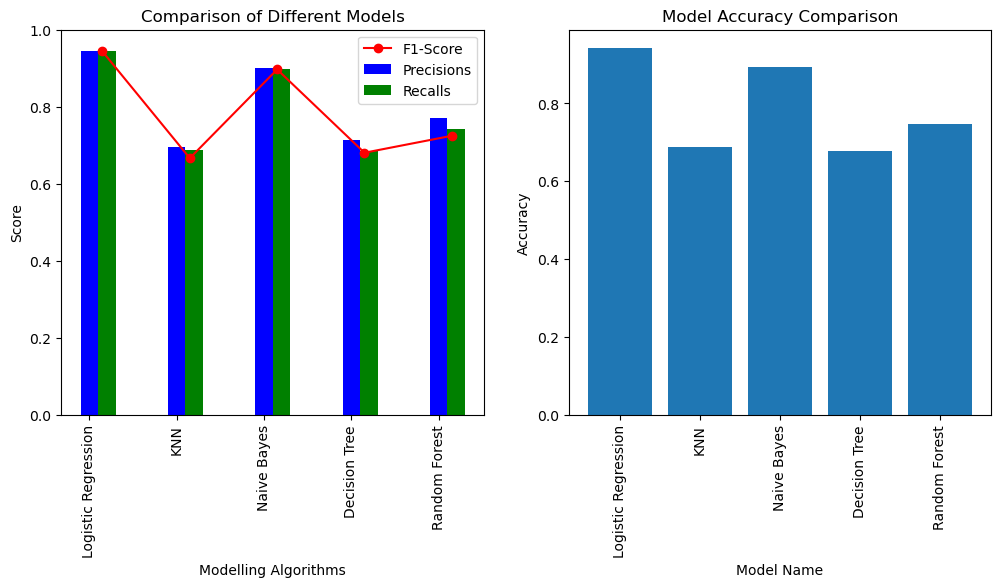

In [349]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
bar_width = 0.2
idx = np.array(range(uni_cv_df.shape[0]))
labels = uni_cv_df['Model Name(CV-UniGram)']

ax1.bar(data=uni_cv_df, height='Precision', x=idx, color='b', width=bar_width,label='Precisions')
ax1.bar(data=uni_cv_df, height='Recall', x=idx+bar_width, color='g', width=bar_width,label='Recalls')
ax1.plot(idx+0.15, uni_cv_df['F1-Score'], marker='o', color='r',label = 'F1-Score')
ax1.set_xticks(idx)
ax1.set_xticklabels(labels, rotation=90)
ax1.set_xlabel('Modelling Algorithms')
ax1.set_ylabel('Score')
ax1.set_ylim((0, 1))
ax1.set_title('Comparison of Different Models')
ax1.legend()

ax2.bar(uni_cv_df['Model Name(CV-UniGram)'], uni_cv_df['Accuracy'])
ax2.set_xticklabels(uni_cv_df['Model Name(CV-UniGram)'], rotation=90)
ax2.set_xlabel('Model Name')
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy Comparison')

plt.show()


## Model 2: BiGram Count Vectorizer

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Splitting the data into train and test sets
X = model_df['final']
Y = model_df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = model_df['genre'])

# Initialize the count vectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))

# Fit the vectorizer to the training data and transform the train and test data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Define the different models
models = [
    LogisticRegression(solver='lbfgs'),
    KNeighborsClassifier(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Define the hyperparameter grids for each model
logistic_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
}
knn_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
nb_grid = {
    'alpha': [0.1, 1, 10]
}
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7]
}
rf_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7]
}

# Define the grid dictionary that holds the hyperparameter grids for all the models
grid_dict = {
    'Logistic Regression': logistic_grid,
    'KNN': knn_grid,
    'Naive Bayes': nb_grid,
    'Decision Tree': dt_grid,
    'Random Forest': rf_grid
}

bi_cv_df = pd.DataFrame(columns=['Model Name(CV-BiGram)', 'Precision', 'Recall', 'F1-Score','Accuracy'])
# Loop through each model
for model_name, model in zip(['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'], models):
    # Perform grid search on the current model
    grid_search = GridSearchCV(model, grid_dict[model_name], scoring='accuracy', cv=5)
    grid_search.fit(X_train_vectorized, y_train)
    
    # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    print("Best accuracy found: ", grid_search.best_score_)
    # Train the model with the best parameters on the entire training data
    best_model = models[['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'].index(model_name)]
    best_model.set_params(**best_params)
    best_model.fit(X_train_vectorized, y_train)

    # Get the predictions on the test data
    y_pred = best_model.predict(X_test_vectorized)

    # Get the classification report
    cl_rp = classification_report(y_test, y_pred, target_names=['action', 'comedy', 'scifi'])
    class_report = classification_report(y_test, y_pred, target_names=['action', 'comedy', 'scifi'],output_dict=True)
    # Extract the precision, recall, and f1-score for the average/weighted average metric
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']
    accuracy = grid_search.best_score_
    # Append the metrics for the current model to the metrics dataframe
    bi_cv_df = bi_cv_df.append({'Model Name(CV-BiGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)
    print("Classification Report: \n", cl_rp)

In [266]:
bi_cv_df

Model Name(CV-BiGram)  Precision    Recall  F1-Score  Accuracy
0   Logistic Regression   0.948087  0.948310  0.947996  0.949625
1                   KNN   0.674169  0.667912  0.601643  0.679517
2           Naive Bayes   0.906518  0.897185  0.895806  0.904367
3         Decision Tree   0.713816  0.683727  0.679773  0.677331
4         Random Forest   0.754487  0.746139  0.736136  0.762432

the countvec and unigram model:

Logistic Regression performs the best in every category and is by far the best model. 
the 2nd best model is Naive Bayes is almost 90% is all categories.

it shows that the model predicts the model with better than 90% accuracy.

knn and decision tree has very low values for all the metrics. the accuracy is hovering around the 67% range.

C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\3935026160.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(bi_cv_df['Model Name(CV-BiGram)'], rotation=90)


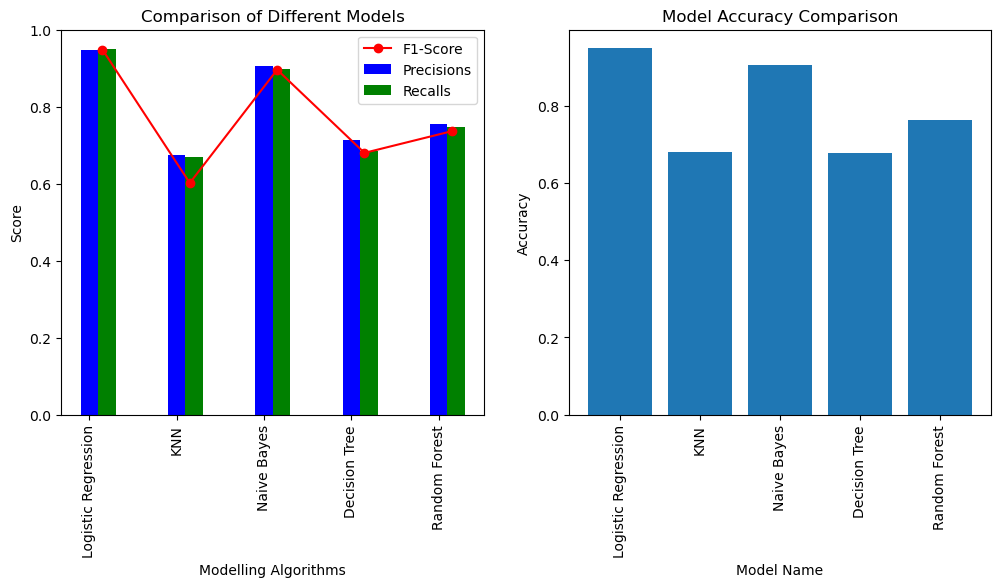

In [346]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
bar_width = 0.2
idx = np.array(range(bi_cv_df.shape[0]))
labels = bi_cv_df['Model Name(CV-BiGram)']

ax1.bar(data=bi_cv_df, height='Precision', x=idx, color='b', width=bar_width,label='Precisions')
ax1.bar(data=bi_cv_df, height='Recall', x=idx+bar_width, color='g', width=bar_width,label='Recalls')
ax1.plot(idx+0.15, bi_cv_df['F1-Score'], marker='o', color='r',label = 'F1-Score')
ax1.set_xticks(idx)
ax1.set_xticklabels(labels, rotation=90)
ax1.set_xlabel('Modelling Algorithms')
ax1.set_ylabel('Score')
ax1.set_ylim((0, 1))
ax1.set_title('Comparison of Different Models')
ax1.legend()

ax2.bar(bi_cv_df['Model Name(CV-BiGram)'], bi_cv_df['Accuracy'])
ax2.set_xticklabels(bi_cv_df['Model Name(CV-BiGram)'], rotation=90)
ax2.set_xlabel('Model Name')
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy Comparison')

plt.show()

## comparing the countvec models

we can see that in terms of accuracy unigram performs better. Logistics,Naive Bayes performs the best.


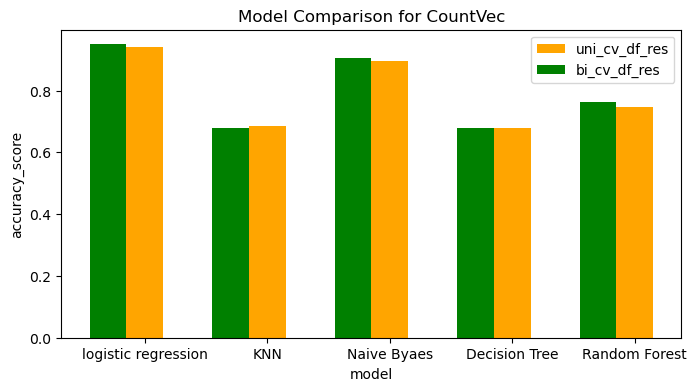

In [350]:
uni_cv_df_res = pd.DataFrame(uni_cv_df, columns=['Model Name(CV-UniGram)', 'Accuracy'])
bi_cv_df_res = pd.DataFrame(bi_cv_df, columns=['Model Name(CV-BiGram)', 'Accuracy'])

y1 = uni_cv_df_res['Accuracy']
y2 = bi_cv_df_res['Accuracy']

fig, ax = plt.subplots(figsize = (8,4))
ind = np.arange(len(uni_cv_df_res))

width = 0.3  
plt.bar(ind, y1, width, color = 'orange')
plt.bar(ind - width, y2, width,color = 'green')

plt.title('Model Comparison for CountVec')
plt.xlabel('model')
plt.ylabel('accuracy_score')
plt.xticks(np.arange(5), ['logistic regression', 'KNN','Naive Byaes', 'Decision Tree', 'Random Forest'])
plt.legend(['uni_cv_df_res', 'bi_cv_df_res'])

## Model 2: UniGram Tfifdf Vectorizer

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the data into train and test sets
X = model_df['final']
Y = model_df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = model_df['genre'])

# Initialize the Tfidf vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1))

# Fit the vectorizer to the training data and transform the train and test data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Define the different models
models = [
    LogisticRegression(solver='lbfgs'),
    KNeighborsClassifier(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Define the hyperparameter grids for each model
logistic_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}
knn_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
nb_grid = {
    'alpha': [0.1, 1, 10]
}
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7]
}
rf_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7]
}

# Define the grid dictionary that holds the hyperparameter grids for all the models
grid_dict = {
    'Logistic Regression': logistic_grid,
    'KNN': knn_grid,
    'Naive Bayes': nb_grid,
    'Decision Tree': dt_grid,
    'Random Forest': rf_grid
}

uni_tfidf_df = pd.DataFrame(columns=['Model Name(tfidf-UniGram)', 'Precision', 'Recall', 'F1-Score','Accuracy'])
# Loop through each model
for model_name, model in zip(['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'], models):
    # Perform grid search on the current model
    grid_search = GridSearchCV(model, grid_dict[model_name], scoring='accuracy', cv=5)
    grid_search.fit(X_train_vectorized, y_train)
    
    # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    print("Best accuracy found: ", grid_search.best_score_)
    # Train the model with the best parameters on the entire training data
    best_model = models[['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'].index(model_name)]
    best_model.set_params(**best_params)
    best_model.fit(X_train_vectorized, y_train)

    # Get the predictions on the test data
    y_pred = best_model.predict(X_test_vectorized)

    # Get the classification report
    cl_rp = classification_report(y_test, y_pred, target_names=['action', 'comedy', 'scifi'])
    class_report = classification_report(y_test, y_pred, target_names=['action', 'comedy', 'scifi'],output_dict=True)
    
    # Extract the precision, recall, and f1-score for the average/weighted average metric
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']
    accuracy = grid_search.best_score_
    
    # Append the metrics for the current model to the metrics dataframe
    uni_tfidf_df = uni_tfidf_df.append({'Model Name(tfidf-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)
    print("Classification Report: \n", cl_rp)


C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best accuracy found:  0.9497741450756418


C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\1343614949.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_tfidf_df = uni_tfidf_df.append({'Model Name(tfidf-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Classification Report: 
               precision    recall  f1-score   support

      action       0.98      1.00      0.99      2940
      comedy       0.94      0.92      0.93      2902
       scifi       0.93      0.93      0.93      2785

    accuracy                           0.95      8627
   macro avg       0.95      0.95      0.95      8627
weighted avg       0.95      0.95      0.95      8627

Best accuracy found:  0.6916389431428633


C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\1343614949.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_tfidf_df = uni_tfidf_df.append({'Model Name(tfidf-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Classification Report: 
               precision    recall  f1-score   support

      action       1.00      1.00      1.00      2940
      comedy       0.53      1.00      0.69      2902
       scifi       0.93      0.07      0.12      2785

    accuracy                           0.70      8627
   macro avg       0.82      0.69      0.60      8627
weighted avg       0.82      0.70      0.61      8627

Best accuracy found:  0.9024296235956962
Classification Report: 
               precision    recall  f1-score   support

      action       0.88      0.97      0.92      2940
      comedy       0.90      0.93      0.92      2902
       scifi       0.95      0.81      0.87      2785

    accuracy                           0.91      8627
   macro avg       0.91      0.90      0.90      8627
weighted avg       0.91      0.91      0.90      8627



C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\1343614949.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_tfidf_df = uni_tfidf_df.append({'Model Name(tfidf-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Best accuracy found:  0.6756921994612657


C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\1343614949.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_tfidf_df = uni_tfidf_df.append({'Model Name(tfidf-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Classification Report: 
               precision    recall  f1-score   support

      action       0.85      0.65      0.74      2940
      comedy       0.65      0.52      0.58      2902
       scifi       0.61      0.89      0.72      2785

    accuracy                           0.68      8627
   macro avg       0.70      0.69      0.68      8627
weighted avg       0.71      0.68      0.68      8627

Best accuracy found:  0.7578616631645854
Classification Report: 
               precision    recall  f1-score   support

      action       0.86      0.81      0.83      2940
      comedy       0.82      0.48      0.60      2902
       scifi       0.65      0.98      0.78      2785

    accuracy                           0.75      8627
   macro avg       0.78      0.75      0.74      8627
weighted avg       0.78      0.75      0.74      8627



C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\1343614949.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uni_tfidf_df = uni_tfidf_df.append({'Model Name(tfidf-UniGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


In [219]:
uni_tfidf_df

Model Name(tfidf-UniGram)  Precision    Recall  F1-Score  Accuracy
0       Logistic Regression   0.949929  0.950069  0.949954  0.949774
1                       KNN   0.819959  0.687436  0.604301  0.691639
2               Naive Bayes   0.909913  0.904273  0.904240  0.902430
3             Decision Tree   0.703629  0.685958  0.679312  0.675692
4             Random Forest   0.778014  0.753345  0.738914  0.757862

Logistic Regression performs the best in every category and is by far the best model. the 2nd best model is Naive Bayes is 90% is all categories.

it shows that the model predicts the model with better than 90% accuracy.

knn and decision tree has very low values for all the metrics. the accuracy is hovering around the 68% to 69% range.

C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\1823570258.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(uni_tfidf_df['Model Name(tfidf-UniGram)'], rotation=90)


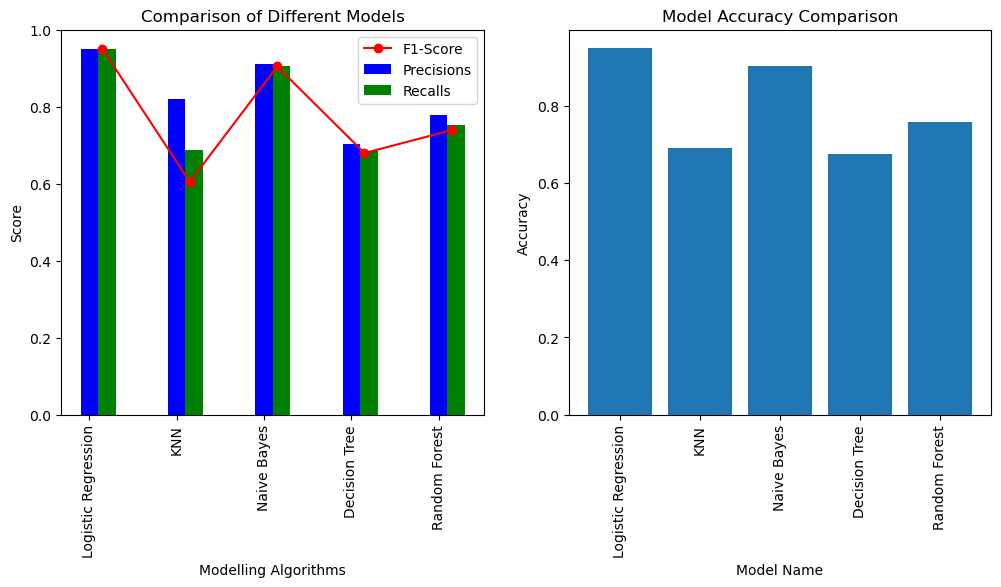

In [351]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
bar_width = 0.2
idx = np.array(range(bi_tfidf_df.shape[0]))
labels = uni_tfidf_df['Model Name(tfidf-UniGram)']

ax1.bar(data=uni_tfidf_df, height='Precision', x=idx, color='b', width=bar_width,label='Precisions')
ax1.bar(data=uni_tfidf_df, height='Recall', x=idx+bar_width, color='g', width=bar_width,label='Recalls')
ax1.plot(idx+0.15, uni_tfidf_df['F1-Score'], marker='o', color='r',label = 'F1-Score')
ax1.set_xticks(idx)
ax1.set_xticklabels(labels, rotation=90)
ax1.set_xlabel('Modelling Algorithms')
ax1.set_ylabel('Score')
ax1.set_ylim((0, 1))
ax1.set_title('Comparison of Different Models')
ax1.legend()

ax2.bar(uni_tfidf_df['Model Name(tfidf-UniGram)'], uni_tfidf_df['Accuracy'])
ax2.set_xticklabels(uni_tfidf_df['Model Name(tfidf-UniGram)'], rotation=90)
ax2.set_xlabel('Model Name')
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy Comparison')

plt.show()

## Model 3: BiGram Tfifdf Vectorizer

In [343]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the data into train and test sets
X = model_df['final']
Y = model_df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = model_df['genre'])

# Initialize the Tfidf vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))

# Fit the vectorizer to the training data and transform the train and test data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Define the different models
models = [
    LogisticRegression(solver='lbfgs'),
    KNeighborsClassifier(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Define the hyperparameter grids for each model
logistic_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}
knn_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
nb_grid = {
    'alpha': [0.1, 1, 10]
}
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7]
}
rf_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7]
}

# Define the grid dictionary that holds the hyperparameter grids for all the models
grid_dict = {
    'Logistic Regression': logistic_grid,
    'KNN': knn_grid,
    'Naive Bayes': nb_grid,
    'Decision Tree': dt_grid,
    'Random Forest': rf_grid
}

bi_tfidf_df = pd.DataFrame(columns=['Model Name(tfidf-BiGram)', 'Precision', 'Recall', 'F1-Score','Accuracy'])
# Loop through each model
for model_name, model in zip(['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'], models):
    # Perform grid search on the current model
    grid_search = GridSearchCV(model, grid_dict[model_name], scoring='accuracy', cv=5)
    grid_search.fit(X_train_vectorized, y_train)
    
    # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    print('Model Name:',model_name)
    print("Best accuracy found: ", grid_search.best_score_)
    # Train the model with the best parameters on the entire training data
    best_model = models[['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'].index(model_name)]
    best_model.set_params(**best_params)
    best_model.fit(X_train_vectorized, y_train)

    # Get the predictions on the test data
    y_pred = best_model.predict(X_test_vectorized)

    # Get the classification report
    cl_rp = classification_report(y_test, y_pred, target_names=['action', 'comedy', 'scifi'])
    class_report = classification_report(y_test, y_pred, target_names=['action', 'comedy', 'scifi'],output_dict=True)
    # Extract the precision, recall, and f1-score for the average/weighted average metric
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']
    accuracy = grid_search.best_score_
    # Append the metrics for the current model to the metrics dataframe
    bi_tfidf_df = bi_tfidf_df.append({'Model Name(tfidf-BiGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)
    print("Classification Report: \n", cl_rp)


C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Model Name: Logistic Regression
Best accuracy found:  0.9580208890657929


C:\Users\parikshit joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2796512005.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bi_tfidf_df = bi_tfidf_df.append({'Model Name(tfidf-BiGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Classification Report: 
               precision    recall  f1-score   support

      action       0.98      1.00      0.99      2940
      comedy       0.90      0.95      0.92      2902
       scifi       0.95      0.88      0.92      2785

    accuracy                           0.94      8627
   macro avg       0.95      0.94      0.94      8627
weighted avg       0.95      0.94      0.94      8627

Model Name: KNN
Best accuracy found:  0.6838889454570138


C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2796512005.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bi_tfidf_df = bi_tfidf_df.append({'Model Name(tfidf-BiGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Classification Report: 
               precision    recall  f1-score   support

      action       1.00      1.00      1.00      2940
      comedy       0.52      1.00      0.68      2902
       scifi       0.96      0.03      0.06      2785

    accuracy                           0.69      8627
   macro avg       0.83      0.68      0.58      8627
weighted avg       0.83      0.69      0.59      8627

Model Name: Naive Bayes
Best accuracy found:  0.9298526780893137
Classification Report: 
               precision    recall  f1-score   support

      action       0.79      1.00      0.88      2940
      comedy       0.90      0.92      0.91      2902
       scifi       0.98      0.68      0.80      2785

    accuracy                           0.87      8627
   macro avg       0.89      0.87      0.86      8627
weighted avg       0.89      0.87      0.86      8627



C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2796512005.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bi_tfidf_df = bi_tfidf_df.append({'Model Name(tfidf-BiGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Model Name: Decision Tree
Best accuracy found:  0.6730588935891858


C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2796512005.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bi_tfidf_df = bi_tfidf_df.append({'Model Name(tfidf-BiGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


Classification Report: 
               precision    recall  f1-score   support

      action       0.93      0.59      0.72      2940
      comedy       0.63      0.59      0.61      2902
       scifi       0.61      0.88      0.72      2785

    accuracy                           0.68      8627
   macro avg       0.72      0.69      0.68      8627
weighted avg       0.72      0.68      0.68      8627

Model Name: Random Forest
Best accuracy found:  0.7742068727186332
Classification Report: 
               precision    recall  f1-score   support

      action       0.85      0.77      0.81      2940
      comedy       0.73      0.61      0.66      2902
       scifi       0.72      0.92      0.81      2785

    accuracy                           0.76      8627
   macro avg       0.77      0.77      0.76      8627
weighted avg       0.77      0.76      0.76      8627



C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\2796512005.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bi_tfidf_df = bi_tfidf_df.append({'Model Name(tfidf-BiGram)': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score,'Accuracy':accuracy}, ignore_index=True)


In [344]:
bi_tfidf_df

Model Name(tfidf-BiGram)  Precision    Recall  F1-Score  Accuracy
0      Logistic Regression   0.945329  0.943637  0.943818  0.958021
1                      KNN   0.827055  0.675897  0.579141  0.683889
2              Naive Bayes   0.887894  0.865991  0.863942  0.929853
3            Decision Tree   0.721879  0.687085  0.683219  0.673059
4            Random Forest   0.767666  0.765882  0.760075  0.774207

if we compare the different models it has shown that the precision and recall is very close to one another 
and it also has the highest precision and recall.Even the f1-score is the highest which means it is accurately able to 
identify both positive and negative instances in the data.



C:\Users\parikshit joshi\AppData\Local\Temp\ipykernel_30020\1725696080.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(bi_tfidf_df['Model Name(tfidf-BiGram)'], rotation=90)


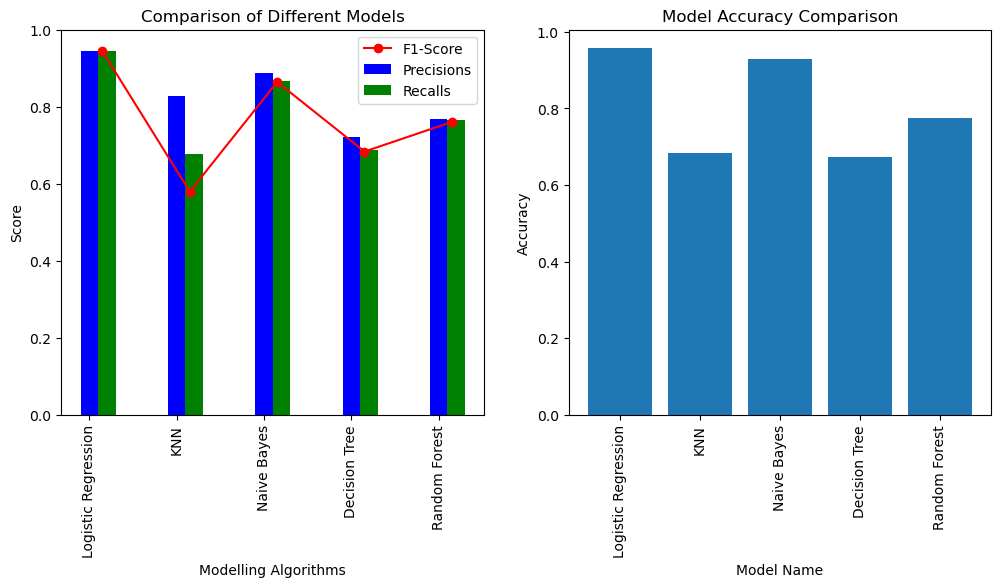

In [347]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
bar_width = 0.2
idx = np.array(range(bi_tfidf_df.shape[0]))
labels = bi_tfidf_df['Model Name(tfidf-BiGram)']

ax1.bar(data=bi_tfidf_df, height='Precision', x=idx, color='b', width=bar_width,label='Precisions')
ax1.bar(data=bi_tfidf_df, height='Recall', x=idx+bar_width, color='g', width=bar_width,label='Recalls')
ax1.plot(idx+0.15, bi_tfidf_df['F1-Score'], marker='o', color='r',label = 'F1-Score')
ax1.set_xticks(idx)
ax1.set_xticklabels(labels, rotation=90)
ax1.set_xlabel('Modelling Algorithms')
ax1.set_ylabel('Score')
ax1.set_ylim((0, 1))
ax1.set_title('Comparison of Different Models')
ax1.legend()

ax2.bar(bi_tfidf_df['Model Name(tfidf-BiGram)'], bi_tfidf_df['Accuracy'])
ax2.set_xticklabels(bi_tfidf_df['Model Name(tfidf-BiGram)'], rotation=90)
ax2.set_xlabel('Model Name')
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy Comparison')

plt.show()


From here we can see that logistic regression and naive Bayes are the 2 best performing model in terms of accuracy.
the worst performing models are knn and decision tree.
Bi-Grams perform better generally except for KNN.

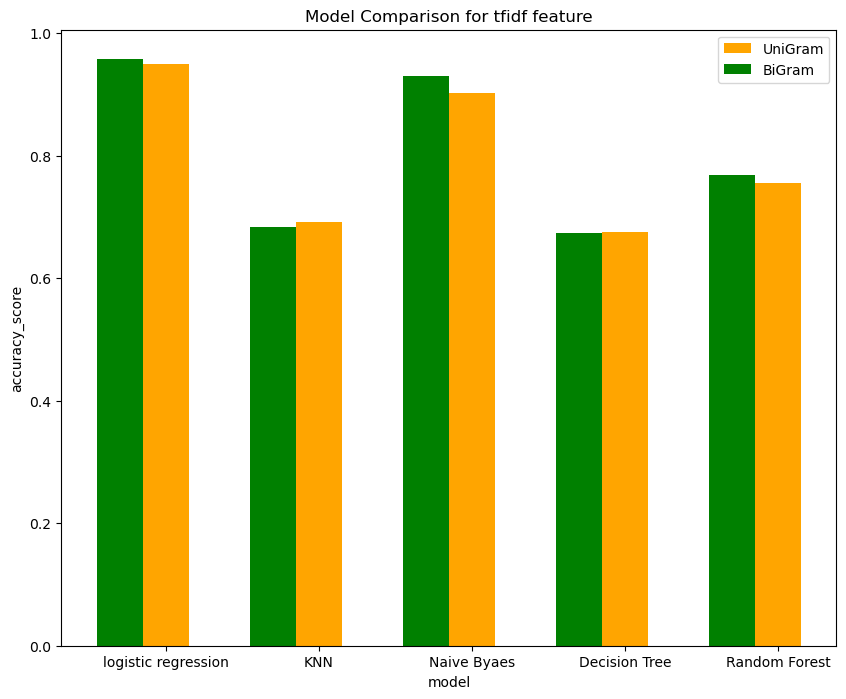

In [191]:
uni_tfidf_df_res = pd.DataFrame(uni_tfidf_df, columns=['Model Name(tfidf-UniGram)', 'Accuracy'])
bi_tfidf_df_res = pd.DataFrame(bi_tfidf_df, columns=['Model Name(tfidf-BiGram)', 'Accuracy'])

y1 = uni_tfidf_df_res['Accuracy']
y2 = bi_tfidf_df_res['Accuracy']

fig, ax = plt.subplots(figsize = (10,8))
ind = np.arange(len(uni_tfidf_df_res))

width = 0.3  
plt.bar(ind, y1, width, color = 'orange')
plt.bar(ind - width, y2, width,color = 'green')

plt.title('Model Comparison for tfidf feature')
plt.xlabel('model')
plt.ylabel('accuracy_score')
plt.xticks(np.arange(5), ['logistic regression', 'KNN','Naive Byaes', 'Decision Tree', 'Random Forest'])
plt.legend(['UniGram', 'BiGram'])

# Evaluation of best models

In [316]:
best_models_cv = bi_cv_df.sort_values(by='Accuracy', ascending=False).iloc[:2]

# create a new dataframe to store the selected rows
cv_best_models_df = pd.DataFrame(columns=['Model Name(CV-BiGram)', 'Accuracy'])

# loop through each row and extract the 'Model Name(CV-UniGram)' and 'Accuracy' columns
for index, row in best_models_cv.iterrows():
    model_name = row['Model Name(CV-BiGram)']
    accuracy = row['Accuracy']
    cv_best_models_df = pd.concat([cv_best_models_df, pd.DataFrame([[model_name, accuracy]], columns=['Model Name(CV-BiGram)', 'Accuracy'])], ignore_index=True)


In [317]:
cv_best_models_df

Model Name(CV-BiGram)  Accuracy
0   Logistic Regression  0.949625
1           Naive Bayes  0.904367

In [324]:
best_models_tfidf = bi_tfidf_df.sort_values(by='Accuracy', ascending=False).iloc[:2]

# create a new dataframe to store the selected rows
Tfidf_best_models_df = pd.DataFrame(columns=['Model Name(tfidf-BiGram)', 'Accuracy'])

# loop through each row and extract the 'Model Name(CV-UniGram)' and 'Accuracy' columns
for index, row in best_models_tfidf.iterrows():
    model_name = row['Model Name(tfidf-BiGram)']
    accuracy = row['Accuracy']
    Tfidf_best_models_df = pd.concat([Tfidf_best_models_df, pd.DataFrame([[model_name, accuracy]], columns=['Model Name(tfidf-BiGram)', 'Accuracy'])], ignore_index=True)

In [325]:
Tfidf_best_models_df

Model Name(tfidf-BiGram)  Accuracy
0      Logistic Regression  0.958021
1              Naive Bayes  0.929853

The analysis shows that the Logistic Regression model using the tf-idf bi-gram features achieves an accuracy score of 0.95, while the Naive Bayes model using the same features obtains an accuracy score of 0.93.

We can also deduce that the models work very well with the combination of tfidf vectorizer and Bi-Grams.

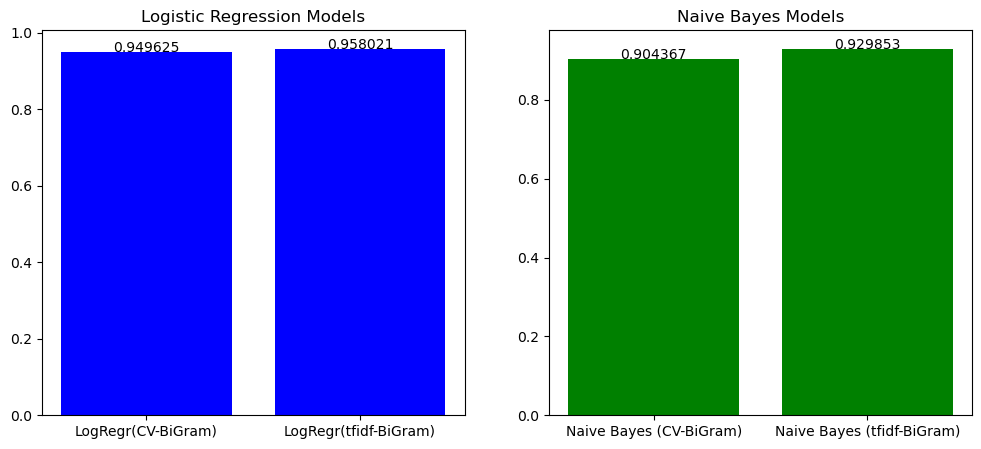

In [342]:
import matplotlib.pyplot as plt

# Create a dataframe with the model names and accuracy values
data = {'Model Name': ['LogRegr(CV-BiGram)', 'Naive Bayes (CV-BiGram)', 'LogRegr(tfidf-BiGram)', 'Naive Bayes (tfidf-BiGram)'], 
        'Accuracy': [0.949625, 0.904367, 0.958021, 0.929853]}
df = pd.DataFrame(data)

# Split the dataframe into two parts: one for logistic regression models and one for naive bayes models
df_logreg = df[df['Model Name'].str.contains('LogRegr')]
df_naivebayes = df[df['Model Name'].str.contains('Naive Bayes')]

# Create two bar plots for logistic regression models and naive bayes models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(df_logreg['Model Name'], df_logreg['Accuracy'], color='blue')
ax1.set_title('Logistic Regression Models')
ax2.bar(df_naivebayes['Model Name'], df_naivebayes['Accuracy'], color='green')
ax2.set_title('Naive Bayes Models')

# Add the accuracy values as labels on the bars
for i, v in enumerate(df_logreg['Accuracy']):
    ax1.text(i, v, str(v), color='black', ha='center')
for i, v in enumerate(df_naivebayes['Accuracy']):
    ax2.text(i, v, str(v), color='black', ha='center')

plt.show()